0.9666666666666668
0.9800000000000001


Text(0, 0.5, 'Cross-validated accuracy')

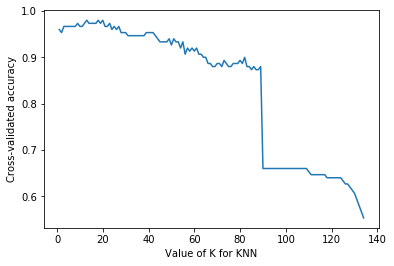

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# (0) read in the iris data
iris = load_iris()

# (1) create X (features) and y (response) (4 points)
X = iris.data
y = iris.target

# (2) 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter), scoring is 'accuracy' (8 points)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

# (3) use average accuracy as an estimate of out-of-sample accuracy (4 points)
print(scores.mean())

# (4) search for an optimal value of K for KNN (20 points)
k_range = range(1,135)
k_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_list.append(scores.mean())

print(max(k_list))

# (5) plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis) (6 points)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [22]:
# (1) 10-fold cross-validation with the best KNN model, scoring is 'accuracy' (6 points)
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

# (2) 10-fold cross-validation with logistic regression, scoring is 'accuracy' (6 points)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())


0.9800000000000001
0.9533333333333334


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# (0) read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# (1) create a Python list of three feature names: TV, radio, newpaper (5 points)
feature_cols = ['TV', 'radio', 'newspaper']

# (2) use the list to select a subset of the DataFrame (X) (5 points)
X = data[feature_cols]

# (3) select the sales column as the response (y) (5 points)
y = data.sales

# (4) 10-fold cross-validation with all three features, scoring is 'neg_mean_squared_error' (6 points) 
lm = LinearRegression()
scores = cross_val_score(lm,X,y,cv = 10,scoring='neg_mean_squared_error')

# (5) fix the sign of MSE scores (5 points)
mse_scores = -scores

# (6) convert from MSE to RMSE (5 points)
rmse_scores = np.sqrt(mse_scores)

# (7) calculate the average RMSE (5 points)
print(rmse_scores.mean())

# (8) 10-fold cross-validation with two features (excluding Newspaper), scoring is'neg_mean_squared_error' (10)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6913531708051797
1.6796748419090768
